# Proyecto individual, segunda parte: EDA Y ML. 

In [66]:
#Importacion de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing
import ast
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
#Leemos el archivo csv como df
df=pd.read_csv('movies_dataset.csv') 
df.head(3)

C:\Users\agusv\AppData\Local\Temp\ipykernel_5540\3197377745.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


### 4) EDA

In [68]:
# Analizamos estructura del dataset
df.shape

(45466, 24)

In [69]:
# Eliminos columnas innecesarias
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average'],
      dtype='object')

In [70]:
# Resumen estadistico de las columnas numericas
df.describe()

,revenue,runtime,vote_average
count,4.546000e+04,45203.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207
std,6.433225e+07,38.407810,1.924216
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000
50%,0.000000e+00,95.000000,6.000000
75%,0.000000e+00,107.000000,6.800000
max,2.787965e+09,1256.000000,10.000000


In [71]:
# Resumen de las columnas no numericas 
df.describe(include=['O'])

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4494,45466,45466,45466,45455,44512,45461,45463,45463,45379,45460,45379,20412,45460
unique,1698,1226,4069,45436,92,44307,44176,22708,2393,17336,1931,6,20283,42277
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",141971,en,No overview found.,0.0,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella
freq,29,36573,5000,3,32269,133,34,11875,17851,136,22395,45014,7,11


In [72]:
# Convertimos la columna 'genres' de string a lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)
# Extraemos el nombre de cada genero y cramos una nueva columna con la lista de nombres de generos
df['genre_names'] = df['genres'].apply(lambda x: [d['name'] for d in x])
# Expandimos la lista de nombres de generos
generos_expandidos = df['genre_names'].explode()
# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()
# Eliminamos los generos que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]

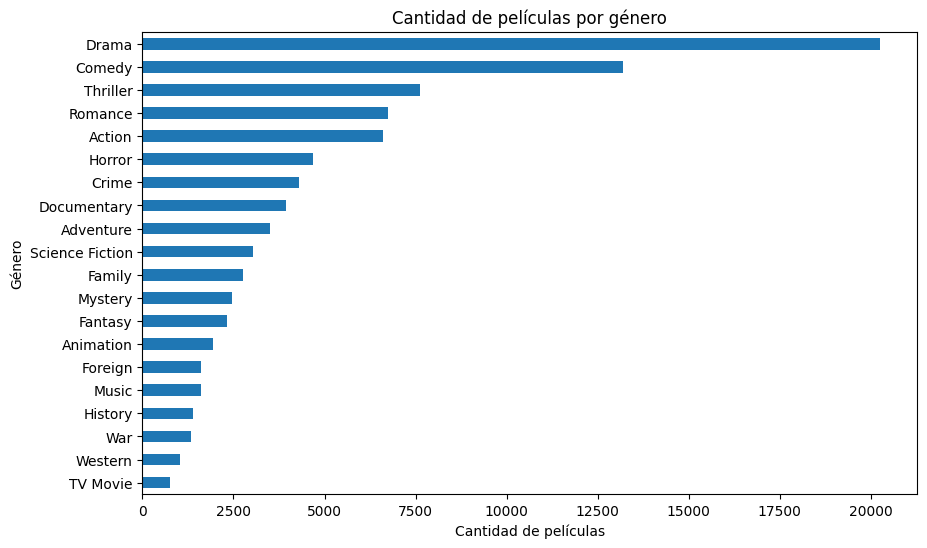

In [73]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los generos por cantidad de peliculas

plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh')  # Creamos un grafico de barras horizontales
plt.title('Cantidad de películas por género')  # Añadimos un título al gráfico
plt.xlabel('Cantidad de películas')  # Añadimos un título al eje x
plt.ylabel('Género')  # Añadimos un título al eje y
plt.show()  # Mostramos el gráfico

In [75]:
df.shape

(45466, 18)

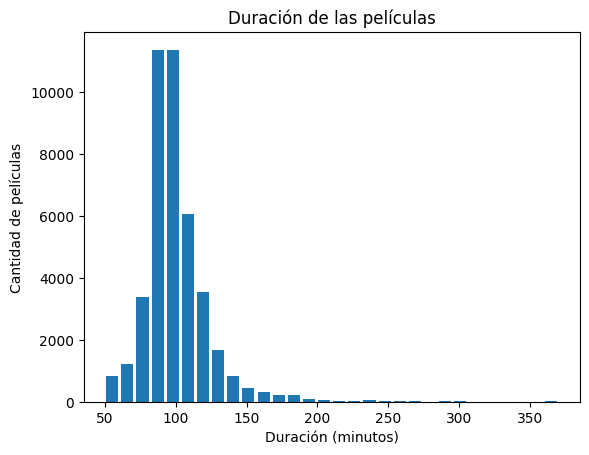

In [76]:
# Duracion de las peliculas
df_filtered = df[(df['runtime'] >= 50) & (df['runtime'] <= 380)]

df_filtered['runtime'].plot(kind='hist', rwidth=0.8, bins=30)

plt.title('Duración de las películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de películas')

plt.show()

In [77]:
# De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de 
# estreno.
# Le damos el formato de fecha a todos los valores de la columna y los que no, le asignamos la etiqueta de nulo
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Se asegura que todos los registros tengan el mismo formato de fecha AAAA-MM-DD
df['release_date'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m-%d')

# se identifican la cantidad de datos nulos de la columna 'release_date' 
df['release_date'].isnull().sum()
# eliminamos los registros con nulos 
df = df.dropna(subset = ['release_date'])

# controlamos para verificar que no existan nulos
df['release_date'].isnull().sum()
# creamos una nueva columna 'release_year' que va a contener unicamnete el dato de año de la columna 'release_date' 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year']=df['release_date'].dt.year

# hacemos control sobre los cambios
df[['release_date','release_year']].tail(10)

,release_date,release_year
45455,1972-01-01,1972
45456,1946-03-29,1946
45457,2000-10-22,2000
45458,2000-10-03,2000
45459,1995-01-01,1995
45460,1991-05-13,1991
45462,2011-11-17,2011
45463,2003-08-01,2003
45464,1917-10-21,1917
45465,2017-06-09,2017


In [78]:
df = df[df['release_year'] >= 1975]

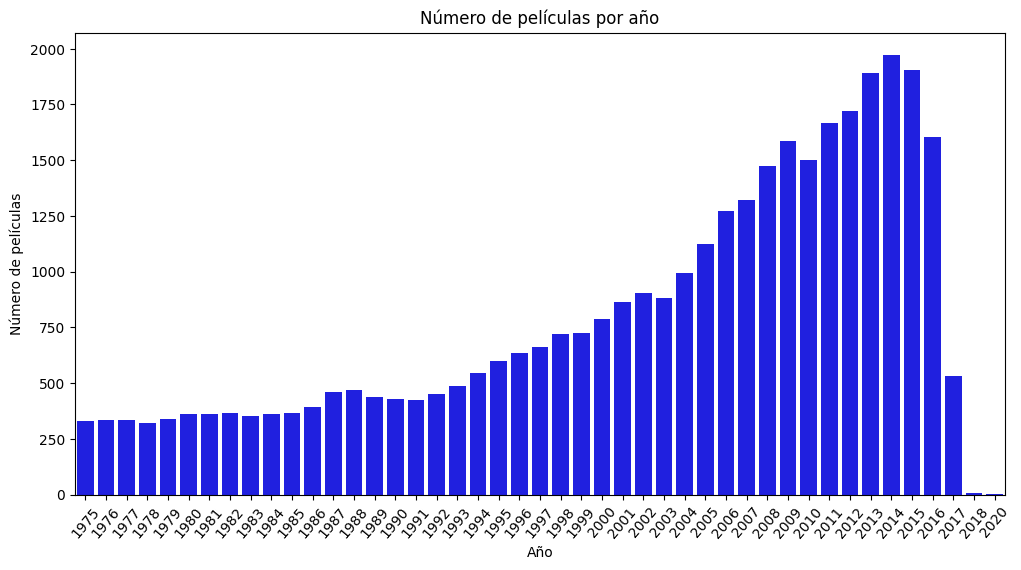

In [79]:
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='b')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas por año')

plt.show()

In [80]:
# Distribucion de puntaje
df.vote_average.describe()

count    35273.000000
mean         5.630899
std          1.851149
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

array([[<Axes: title={'center': 'vote_average'}>]], dtype=object)

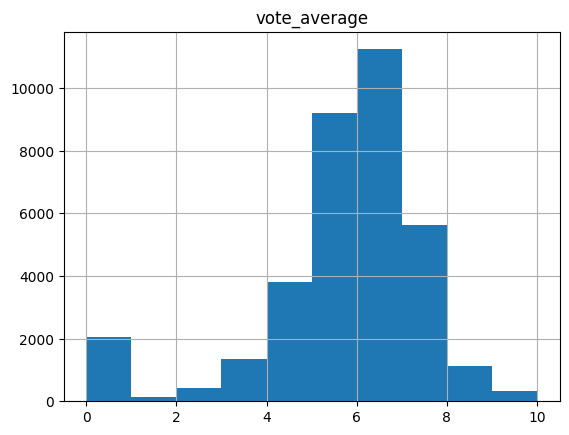

In [81]:
# Analizamos la distribución de las puntuaciones de la pelicula

df.hist('vote_average')

# Machine learning

instalamos la libreria nltk ya que proporciona una amplia gama de herramientas y recursos para trabajar con texto y realizar tareas relacionadas con el procesamiento del lenguaje natural

In [82]:
#pip install nltk

## Usaremos la columna 'overview' del conjunto de datos como la principal caracteristica de entrada para nuestro modelo de Machine Learning.
 Decidimos usar esta columna porque contiene una descripción detallada de cada película, lo que nos permite capturar una gran cantidad de información sobre el contenido de la película. Creemos que esta información es particularmente útil para hacer recomendaciones de peliculas porque las peliculas que son similares en terminos de su contenido suelen ser más similares entre sí que las peliculas que son similares solo en terminos de características más superficiales, como el género o el director.
 La columna 'overview' se transformó en una representación de mochila de palabras para poder usarla en nuestro modelo de Machine Learning.

In [83]:
# Hay valores flotantes en la columna overview, los convertimos a string
df['overview'] = df['overview'].astype(str)

In [84]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
# Utilizamos astype para asegurarnos de que todos los valores siguen siendo cadenas de texto
text = ' '.join(df['overview'].astype(str))


In [85]:
df.shape

(35273, 19)

In [86]:

# Eliminamos los duplicados basandonos en la columna 'title'
df = df.drop_duplicates(subset='title')

# Recreamos el indice de los titulos luego de eliminar los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


# Reducimos la base de datos
df.shape

(33333, 19)

## Debido a que el dataset contiene muchos registros decidí samplear los datos a través de las columnas 'popularity' y 'vote_average'.
Esto lo hago para que en la api, el usuario a la hora de buscar peliculas no reciba un feedback con peliculas menos conocidas. Estas dos columnas permiten recortar el dataset por peloculas con mayor popularidad o con un mayor puntaje de reseña.

In [87]:
# Vamos a probar cual de las dos columnas funciona mejor a la hora de hacer recomendaciones
# Convertimos las columnas a float
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Ordenamos por popularidad y tomamos las primeras 10000 filas
df_popular = df.sort_values(by='popularity', ascending=False).head(5000).reset_index(drop=True)

# Ordenamos por vote_average y tomamos las primeras 10000 filas
df_highly_rated = df.sort_values(by='vote_average', ascending=False).head(5000).reset_index(drop=True)


In [88]:
df_popular.shape

(5000, 19)

## Recomendacion de peliculas por popularidad: df_popular

In [89]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_popular['overview'] = df_popular['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_popular['genres'] = df_popular['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'
df_popular['production_companies'] = df_popular['production_companies'].fillna('')

# Convertir la columna 'production_companies' a string si es necesario
df_popular['production_companies'] = df_popular['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Crear una nueva columna combinando las características de interés
df_popular['combined_features'] = df_popular['overview'] + ' ' + df_popular['genres'] + ' ' + df_popular['production_companies']

# Convertimos todos los textos a minúsculas para evitar duplicados
df_popular['combined_features'] = df_popular['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_popular['combined_features'])

# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un índice con los títulos de las películas
indices = pd.Series(df_popular.index, index=df_popular['title']).drop_duplicates()"""

"from sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\nfrom sklearn.feature_extraction.text import HashingVectorizer\n\n# Aseguramos que los datos de la columna 'overview' sean strings\ndf_popular['overview'] = df_popular['overview'].fillna('').astype('str')\n\n# Aseguramos que los datos de la columna 'genres' sean strings\ndf_popular['genres'] = df_popular['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')\n\n# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'\ndf_popular['production_companies'] = df_popular['production_companies'].fillna('')\n\n# Convertir la columna 'production_companies' a string si es necesario\ndf_popular['production_companies'] = df_popular['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)\n\n# Crear una nueva columna combinando las características de interés\ndf_popular['combined_features'] = df_

In [90]:
"""def recomendacion2(title, cosine_sim=cosine_sim):
    if title not in df_popular['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtiene el índice de la película que coincide con el título
        idx = indices[title]

        # Obtiene las puntuaciones de similitud de todas las películas con la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordena las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtiene las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtiene los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devuelve las 5 películas más similares
        return df_popular['title'].iloc[movie_indices]

print(recomendacion2("Toy Story"))
recomendacion2("Jumanji")
print(recomendacion2("Titanic"))"""

'def recomendacion2(title, cosine_sim=cosine_sim):\n    if title not in df_popular[\'title\'].values:\n        return \'La película no se encuentra en el conjunto de datos de muestra.\'\n    else:\n        # Obtiene el índice de la película que coincide con el título\n        idx = indices[title]\n\n        # Obtiene las puntuaciones de similitud de todas las películas con la película dada\n        sim_scores = list(enumerate(cosine_sim[idx]))\n\n        # Ordena las películas en función de las puntuaciones de similitud\n        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n\n        # Obtiene las puntuaciones de las 5 películas más similares\n        sim_scores = sim_scores[1:6]\n\n        # Obtiene los índices de las películas\n        movie_indices = [i[0] for i in sim_scores]\n\n        # Devuelve las 5 películas más similares\n        return df_popular[\'title\'].iloc[movie_indices]\n\nprint(recomendacion2("Toy Story"))\nrecomendacion2("Jumanji")\nprint(recome

## df_popular:
* Este DataFrame parece dar recomendaciones más variadas. En algunos casos, las películas recomendadas parecen tener poco en común con la película original (por ejemplo, las recomendaciones para "Titanic" y "Avatar"). Sin embargo, para "Toy Story", las recomendaciones son muy relevantes ya que todas son de la misma franquicia o de cortos relacionados.

## Recomendacion de peliculas por vote_Average

In [91]:
df_highly_rated.shape

(5000, 19)

In [92]:
# Cosine_similarity es una función que calcula la similitud del coseno. La similitud del coseno es una 
#metrica utilizada para determinar cuan similares son dos vectores.
#HashingVectorizer es una clase que convierte una coleccion de documentos de texto en una matriz de ocurrencias de tokens. 


# Aseguramos que los datos de la columna 'overview', 'genres' y 'production_companies' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')
df_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
# Reemplazar los valores nulos con cadenas vacias
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Creamos una nueva columna llamada 'combined_features' que es una combinacion de las columnas 'overview', 'genres' y 
# 'production_companies'. Esta columna se usara para calcular la similitud entre diferentes peliculas.
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)
# De esta manera evitamos que las palabras mas comunes afecten a nuestro procesamiento de datos
# y evitamos que se generen vectores mas grandes

# Aprende el vocabulario de 'combined_features' y transforma 'combined_features' en una matriz de vectores
hash_matrix = hash_vectorizer.fit_transform(df_highly_rated['combined_features'])
"""
# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un indice con los titulos de las peliculas
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()"""

"\n\n# Aseguramos que los datos de la columna 'overview', 'genres' y 'production_companies' sean strings\ndf_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')\ndf_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')\n# Reemplazar los valores nulos con cadenas vacias\ndf_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')\ndf_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)\n\n# Creamos una nueva columna llamada 'combined_features' que es una combinacion de las columnas 'overview', 'genres' y \n# 'production_companies'. Esta columna se usara para calcular la similitud entre diferentes peliculas.\ndf_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']\n\n# Converti

In [93]:
"""def recomendacion(title, cosine_sim=cosine_sim):
    # Verificamos que el titulo ingresado se encuentre en el df
    if title not in df_highly_rated['title'].values:
        return 'La pelicula no se encuentra en el conjunto de la base de datos.'
    else:
        # Si el titulo estan en el df, encontramos su indice
        index = indices[title]
        # Esto nos da una manera de acceder a la fila correspondiente en la matriz de similitud del coseno.

        # Obtenemos las puntuaciones de similitud de todas las peliculas con la pelicula dada
        similarity = list(enumerate(cosine_sim[index]))

        # Ordenamos las peliculas en funcion de las puntuaciones de similitud
        similarity = sorted(similarity, key=lambda x: x[1], reverse=True)

        # Obtenemos 5 peliculas mas similares
        similarity = similarity[1:6]

        # Obtiene los indices de las peliculas
        movie_indices = [i[0] for i in similarity]

        # Devuelve las 5 peliculas mas similares
        return df_highly_rated['title'].iloc[movie_indices].tolist()"""


"def recomendacion(title, cosine_sim=cosine_sim):\n    # Verificamos que el titulo ingresado se encuentre en el df\n    if title not in df_highly_rated['title'].values:\n        return 'La pelicula no se encuentra en el conjunto de la base de datos.'\n    else:\n        # Si el titulo estan en el df, encontramos su indice\n        index = indices[title]\n        # Esto nos da una manera de acceder a la fila correspondiente en la matriz de similitud del coseno.\n\n        # Obtenemos las puntuaciones de similitud de todas las peliculas con la pelicula dada\n        similarity = list(enumerate(cosine_sim[index]))\n\n        # Ordenamos las peliculas en funcion de las puntuaciones de similitud\n        similarity = sorted(similarity, key=lambda x: x[1], reverse=True)\n\n        # Obtenemos 5 peliculas mas similares\n        similarity = similarity[1:6]\n\n        # Obtiene los indices de las peliculas\n        movie_indices = [i[0] for i in similarity]\n\n        # Devuelve las 5 pelicula

## df_highly_rated: 
* Este DataFrame parece dar recomendaciones más consistentes. Las películas recomendadas tienden a ser altamente valoradas y, en algunos casos, parecen compartir similitudes temáticas o de género con la película original (por ejemplo, las recomendaciones para "Avatar" y "Jumanji").

In [94]:
# df_highly_rated.to_csv('movies_final_with_combined_features2.csv', index=False)

# Hay que optimizar el codigo para que funcione el deploy de la api en render

In [ ]:
#inicialmente intentamos usar un enfoque basado en la similitud del coseno, calculando la similitud del coseno entre todas las parejas 
#de películas. Sin embargo, descubrimos que este enfoque era bastante costoso en términos de memoria y rendimiento, ya que la matriz de 
#similitudes era muy grande y difícil de manejar de manera eficiente.

#Para solucionar este problema, cambiamos a un modelo de K-vecinos más cercanos, o KNN. Este modelo nos permitió encontrar las 
#películas más similares de manera más eficiente, sin tener que almacenar todas las similitudes.


In [95]:
from sklearn.feature_extraction.text import CountVectorizer #para convertir las caracteristicas combinadas en una matriz
from sklearn.neighbors import NearestNeighbors # para crear un modelo que pueda encontrar los vecinos mas cercanos en un espacio dado

# Nos aseguramos de que estamos trabajando con los datos exportados del df_highly_rated
df_highly_rated = pd.read_csv('movies_final_with_combined_features2.csv')

#  En esta matriz, cada fila representa una película y cada columna 
# representa un termino en las caracteristicas combinadas
cv = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = cv.fit_transform(df_highly_rated['combined_features'])

# Creamos un modelo para encontrar los vecinos mas cercanos en un espacio de caracterisicaa
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(count_matrix)

# Creamos un indice de titulos de peliculas y eliminamos los duplicados
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()


In [101]:
def recomendacion(title):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista
    ''' 
    # Verifica si el titulo ingresado se encuentra en el df
    if title not in df_highly_rated['title'].values:
        return 'La pelicula no se encuentra en el conjunto de la base de datos.'
    else:
        # Si el título esta en el df, encuentra su indice
        index = indices[title]

        # Obtiene las puntuaciones de similitud de las 5 peliculas más cercanas
        distances, indices_knn = nn.kneighbors(count_matrix[index], n_neighbors=6)  # indica que queremos encontrar las 6 peliculas más similares, incluyendo la pelicula dada

        # Obtiene los indices de las peliculas
        movie_indices = indices_knn[0][1:]  # Se omite el primer indice (la pelicula misma) con [1:]

        # Devuelve las 5 peliculas mas similares
        return df_highly_rated['title'].iloc[movie_indices].tolist()

print(recomendacion('Toy Story'))
print(recomendacion('Avatar'))
print(recomendacion('Jumanji'))
print(recomendacion('Scarface'))

['Toy Story 3', 'Toy Story 2', 'Partysaurus Rex', 'Banana', 'Cosmic Scrat-tastrophe']
['X-Men: Days of Future Past', 'Predator', 'Lone Survivor', 'The City of Lost Children', 'Cosmic Scrat-tastrophe']
La pelicula no se encuentra en el conjunto de la base de datos.
['Elite Squad', 'Extraordinary Mission', 'Casino', "Carlito's Way", 'Highway Patrolman']
